In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from statistics import stdev, mean

In [2]:
fifa = pd.read_csv('data.csv')

# Data Cleaning

In [3]:
pos_dic = {'CAM': 'Att. Mid', 'CB': 'Cent. Back', 'CDM': 'Def. Mid', 'CF': 'Striker', 'CM': 'Cent. Mid', 'GK': 'G. Keeper', 'LAM': 'Att. Mid', 'LB': 'Wing Back'}

In [4]:
col_to_rem = ['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Real Face']
fifa = fifa.drop(columns = col_to_rem)

In [5]:
sub_col = list(fifa.loc[:, 'Crossing':'GKReflexes'].columns.values)
sub_col.append('Jersey Number')
sub_col.append('Position')
fifa.dropna(subset = sub_col, how = 'any', inplace = True)

In [6]:
col_fill = fifa.loc[:, 'LS':'RB'].columns
fifa.loc[fifa['LS'].isnull(), col_fill] = '0'

In [7]:
fifa.loc[:, 'Attack_WR'] = fifa.loc[: ,'Work Rate'].apply(lambda x: x.split('/')[0])
fifa.loc[:, 'Defense_WR'] = fifa.loc[: ,'Work Rate'].apply(lambda x: x.split('/')[1])
fifa.drop(columns = ['Work Rate'], inplace = True)

In [8]:
fifa['Club'].fillna('Free', inplace = True)
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].str[-4:]
fifa['Contract Valid Until'].fillna('Unkown', inplace = True)
fifa['Joined'] = fifa['Joined'].str[-4:]
fifa['Joined'].fillna('Unkown', inplace = True)
fifa['Loaned From'].fillna('None', inplace = True)
fifa['Release Clause'].fillna('€0M', inplace = True)

In [9]:
for att_col in fifa.loc[:, 'Crossing':'GKReflexes'].columns.values:
    fifa.loc[:, att_col] = fifa.loc[:, att_col].astype('int64')
for misc_col in ['International Reputation', 'Weak Foot', 'Skill Moves']:
    fifa.loc[:, misc_col] = fifa.loc[:, misc_col].astype('int64')
for pos_col in col_fill:
    fifa.loc[:, pos_col] = fifa.loc[:, pos_col].str[:2].astype('int64')

In [10]:
fifa.loc[:, 'Value'] = fifa.loc[:, 'Value'].apply(lambda x: '€0K' if x == '€0' else x)
fifa.loc[:, 'Wage'] = fifa.loc[:, 'Wage'].apply(lambda x: '€0K' if x == '€0' else x)
fifa.loc[:, 'Value'] = fifa.loc[:, 'Value'].apply(lambda x: float(x[1:-1])*1000000 if x[-1] == 'M' else float(x[1:-1])*1000).astype('int64')
fifa.loc[:, 'Wage'] = fifa.loc[:, 'Wage'].apply(lambda x: float(x[1:-1])*1000000 if x[-1] == 'M' else float(x[1:-1])*1000).astype('int64')
fifa.loc[:, 'Release Clause'] = fifa.loc[:, 'Release Clause'].apply(lambda x: float(x[1:-1])*1000000 if x[-1] == 'M' else float(x[1:-1])*1000).astype('int64')

In [11]:
def height_func(x):
    h_list = x.split('\'')
    return round(int(h_list[0])*30.48 + int(h_list[1])*2.54)

In [12]:
fifa.loc[:, 'Height'] = fifa.loc[:, 'Height'].apply(height_func)
fifa.loc[:, 'Weight'] = fifa.loc[:, 'Weight'].apply(lambda x: x[:-3]).astype('int64')
fifa.loc[:, 'Jersey Number'] = fifa.loc[:, 'Jersey Number'].astype('int64')

In [13]:
body_shape_dict = {'Lean': 'Lean', 'Normal': 'Normal', 'Stocky': 'Stocky', 'Messi': 'Normal',
                   'C. Ronaldo': 'Normal', 'Neymar': 'Lean', 'Courtois': 'Lean',
                   'PLAYER_BODY_TYPE_25': 'Lean', 'Shaqiri': 'Stocky', 'Akinfenwa': 'Stocky'}
fifa.loc[:, 'Body Type'] = fifa.loc[:, 'Body Type'].map(body_shape_dict)

In [14]:
fifa.loc[fifa['Club'] == ' SSV Jahn Regensburg', 'Club'] = 'SSV Jahn Regensburg'

In [15]:
fifa.head(3).style

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack_WR,Defense_WR
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,2202,Left,5,4,4,Normal,RF,10,2004,None,2021,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,226500000,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,Right,5,4,5,Normal,ST,7,2018,None,2022,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,127100000,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,2143,Right,5,5,5,Lean,LW,10,2017,None,2022,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,228100000,High,Medium


# Visualization

In [16]:
sns_style_dict = {'d':'dark', 'w': 'white', 'dg': 'darkgrid', 'wg': 'whitegrid', 't': 'ticks', 'def': 'darkgrid'}
sns_context_dict = {'p': 'paper', 'n': 'notebook', 'po': 'poster', 't': 'talk', 'def': 'notebook'}

In [17]:
def sns_set(context, style):
    context = sns_context_dict[context]
    style = sns_style_dict[style]
    return sns.set(context=context, style=style)

In [18]:
sns_set('def', 'def')
sns.set_context(rc = {'patch.linewidth': 0.0})

In [19]:
def subplts(x, y):
    return plt.subplots(figsize = (x,y))

#### Available color palattes:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


#### styles: 
white, dark, whitegrid, darkgrid, ticks
#### context options:
paper, notebook, talk, poster

## Basic Visualizations

### 1. Preferred Foot Comparison 

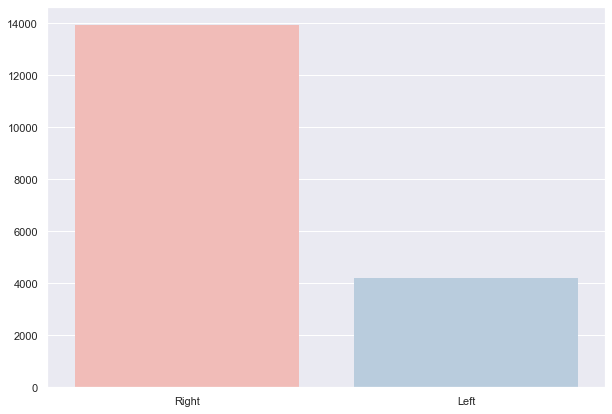

In [20]:
fig, ax = subplts(10,7)
pref_foot = fifa['Preferred Foot'].value_counts()
sns.barplot(x = pref_foot.index, y = pref_foot.values, ax=ax, palette=sns.set_palette('Pastel1'));

## Comparison of clubs based on various attributes

In [21]:
clubs = pd.pivot_table(data = fifa, index = 'Club', values = ['Overall', 'Potential', 'Value', 'Wage', 'Release Clause'], 
                      aggfunc={'Overall': np.mean, 'Potential': np.mean, 'Value':np.sum, 'Wage': np.sum, 'Release Clause': np.sum})

In [22]:
for col_name in clubs.columns:
    print('\n\nSorted based on', col_name, ':')
    print(clubs.sort_values(by = [col_name], ascending = False)[col_name].head(10))



Sorted based on Overall :
Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64


Sorted based on Potential :
Club
Juventus               85.520000
FC Barcelona           85.303030
Real Madrid            84.636364
Manchester City        83.909091
FC Bayern München      83.655172
Paris Saint-Germain    83.566667
Napoli                 83.440000
Manchester United      82.666667
Chelsea                82.636364
Milan                  82.555556
Name: Potential, dtype: float64


Sorted based on Release Clause :
Club
Real Madrid            1857688000
FC Barcelona           1813000000
Manchester City        1512906999
Atlético Madrid        1375649000
Paris Saint-Germain    1216266000


#### Inf:
As seen above, Teams like Barcelona, Real Madrid and Manchester City top the charts when it comes to overall Value and Wages of players. 
Juventus however, a team whose players' total Value isn't as high as Barca or Real, tops the chart when it comes to Overall ratings by a huge margin whilst Man City (pos: >10), Barca (pos: 6), and Real (pos: 4) languish at the bottom of the top 10. This is probably because of the youth players of Barca, Real and City who bring down Overall ratings' average value.

### No.of players under a specific age in each club

In [23]:
temp_fifa = fifa.loc[fifa['Age'] <= 21, ['Club', 'Age']]
youth = temp_fifa.groupby('Club')['Age'].count()
print('Juventus: ', youth['Juventus'])
print('Manchester City: ', youth['Manchester City'])
print('Real Madrid: ', youth['Real Madrid'])
print('FC Barcelona: ', youth['FC Barcelona'])
print('Average Overall for players under 21: ', np.average(fifa.loc[fifa['Age']<21, :]['Overall'].values))

Juventus:  3
Manchester City:  13
Real Madrid:  14
FC Barcelona:  14
Average Overall for players under 21:  59.68143459915612


In [24]:
temp_fifa = fifa.loc[fifa['Age'] <= 20, ['Club', 'Age']]
youth = temp_fifa.groupby('Club')['Age'].count()
print('Juventus: ', youth['Juventus'])
print('Manchester City: ', youth['Manchester City'])
print('Real Madrid: ', youth['Real Madrid'])
print('FC Barcelona: ', youth['FC Barcelona'])
print('Average Overall for players under 20: ', np.average(fifa.loc[fifa['Age']<20, :]['Overall'].values))

Juventus:  2
Manchester City:  10
Real Madrid:  9
FC Barcelona:  10
Average Overall for players under 20:  58.3852065321806


In [25]:
temp_fifa = fifa.loc[fifa['Age'] <= 19, ['Club', 'Age']]
youth = temp_fifa.groupby('Club')['Age'].count()
print('Juventus: ', youth['Juventus'])
print('Manchester City: ', youth['Manchester City'])
print('Real Madrid: ', youth['Real Madrid'])
print('FC Barcelona: ', youth['FC Barcelona'])
print('Average Overall for players under 19: ', np.average(fifa.loc[fifa['Age']<19, :]['Overall'].values))

Juventus:  2
Manchester City:  9
Real Madrid:  6
FC Barcelona:  9
Average Overall for players under 19:  57.23939679547597


#### Inf:
It is clear that the no.of youngsters in Barca, City and Real are significanly higher than that of Juve. This is probably the main reason for the decreased Overall Rating of these clubs. To get a fair picture of a club's strength in terms of its players' abilities and value, it is necessary to remove from the database, the records of players who do not contribute much to the club in real life.

#### Finding out the no.of players present in a club

In [26]:
temp_piv = pd.pivot_table(data=fifa, index='Club', values = 'Age', aggfunc=len)

In [27]:
print('Real Madrid: ', temp_piv.loc['Real Madrid'].values[0])
print('FC Barcelona: ', temp_piv.loc['FC Barcelona'].values[0])
print('Manchester City: ', temp_piv.loc['Manchester City'].values[0])
print('Juventus: ', temp_piv.loc['Juventus'].values[0])

Real Madrid:  33
FC Barcelona:  33
Manchester City:  33
Juventus:  25


#### Inf:
Since the starting lineup consists of only 11 players and the bench 5-8, it is safe to assume that only the top 20 players of a team will play a major role in the clubs's success that season whilst the others, even if they get to play a few matches, wont have any substantial impact in the club's performance. Removing them from the dataset when comparing various clubs would also cut out any unfair advantage/disadvantage that a club with lesser no.of of players may have.

In [28]:
fifa_col = fifa.columns.values
uclubs = fifa['Club'].unique()
fifa_new = pd.DataFrame(columns = fifa_col)

In [29]:
for Club in uclubs:
    temp_club = fifa.loc[fifa['Club'] == Club, :]
    temp_club = temp_club.sort_values(by = 'Overall', ascending = False)
    temp_club = temp_club.head(20)
    fifa_new = fifa_new.append(temp_club)


In [30]:
fifa_new.reset_index(drop=True, inplace= True)
fifa_new = fifa_new.infer_objects()

In [31]:
clubs_new = pd.pivot_table(data = fifa_new, index = 'Club', values = ['Overall', 'Potential', 'Value', 'Wage', 'Release Clause'], 
                      aggfunc={'Overall': np.mean, 'Potential': np.mean, 'Value':np.sum, 'Wage': np.sum, 'Release Clause': np.sum})

In [32]:
for col_name in clubs_new.columns:
    print('\n\nSorted based on', col_name, ':')
    print(clubs_new.sort_values(by = [col_name], ascending = False)[col_name].head(10))



Sorted based on Overall :
Club
Real Madrid            85.25
Juventus               84.85
FC Barcelona           84.85
Manchester City        84.55
FC Bayern München      83.95
Atlético Madrid        83.45
Paris Saint-Germain    82.90
Chelsea                82.70
Tottenham Hotspur      82.60
Manchester United      82.30
Name: Overall, dtype: float64


Sorted based on Potential :
Club
FC Barcelona           88.20
Real Madrid            87.80
Manchester City        86.65
Juventus               86.60
Atlético Madrid        86.15
FC Bayern München      85.95
Paris Saint-Germain    85.30
Tottenham Hotspur      84.55
Chelsea                84.55
Manchester United      84.50
Name: Potential, dtype: float64


Sorted based on Release Clause :
Club
FC Barcelona           1744200000
Real Madrid            1738700000
Manchester City        1452999999
Atlético Madrid        1355000000
Paris Saint-Germain    1163600000
Juventus               1126200000
Tottenham Hotspur      1111299999
Liverpool   

#### Inf:
Since there isn't any column that reflects a players' current form, players can only be rated by their Overall. The top 20 players from each club ( or all the players if the club has less than 20 players ) were selected and a new Dataframe was formed.

The results speak for themselves:
    Teams like Real Madrid, Barcelona and Manchester City consistently top almost all the charts. 

### Result Visualization

In [33]:
clubs_to_vis = ['FC Barcelona', 'Real Madrid', 'Atlético Madrid', 'FC Bayern München',
                'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Tottenham Hotspur',
                'Manchester United', 'Liverpool', 'Arsenal', 'Manchester City']


In [34]:
clubs_vis = fifa_new.set_index('Club', drop = False)

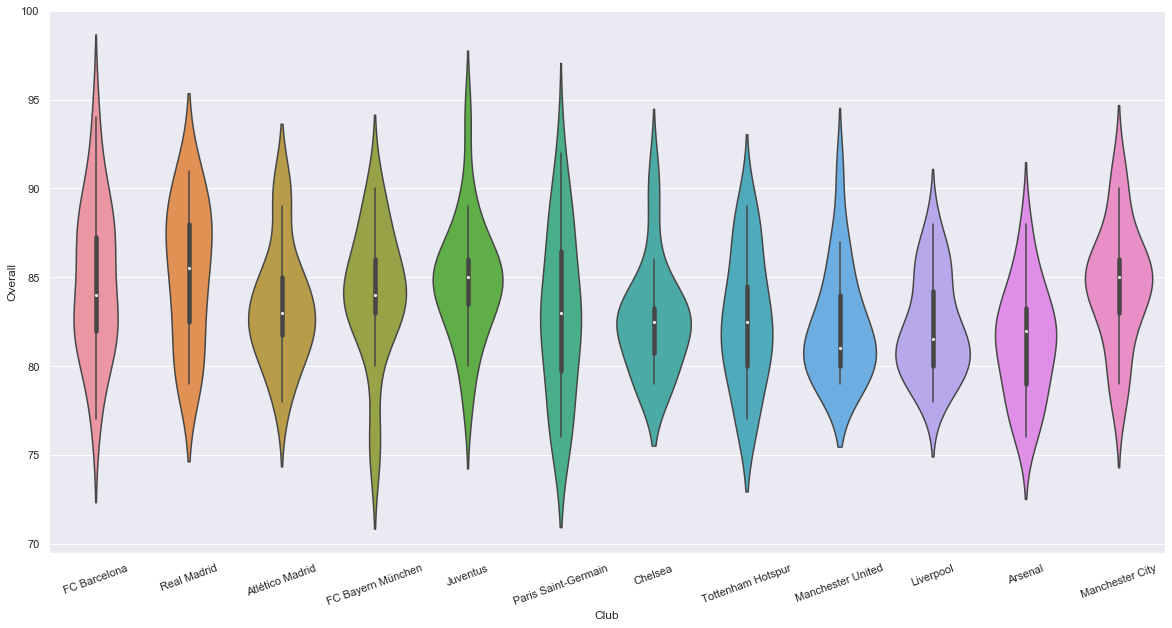

In [35]:
fig, ax = subplts(20, 10)
chart = sns.violinplot(x='Club', y='Overall', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

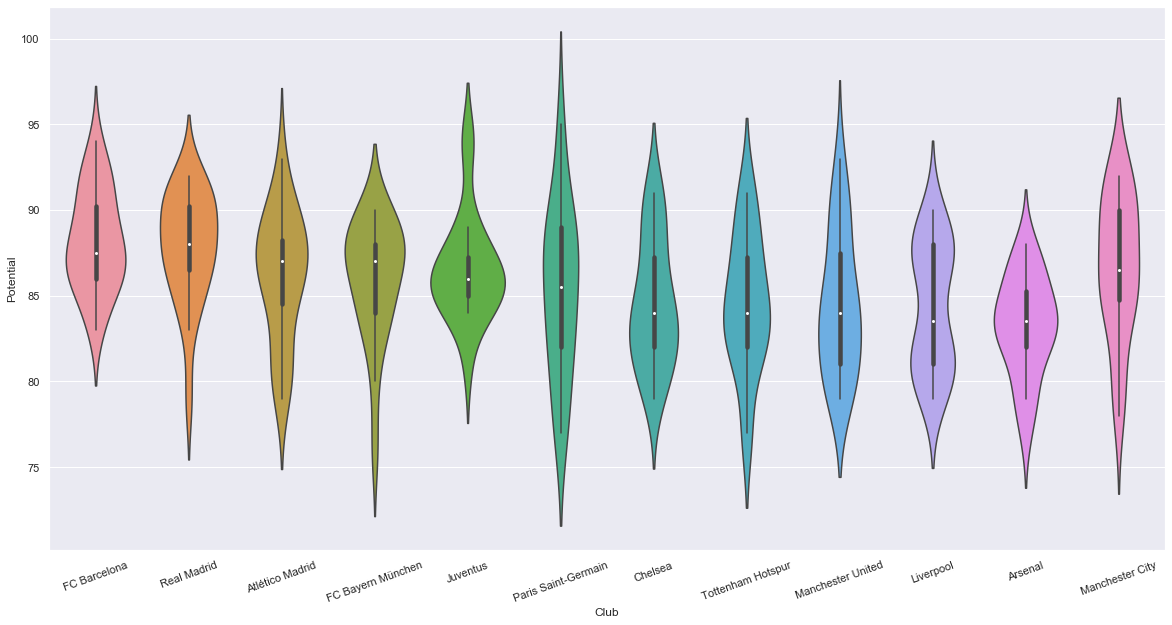

In [36]:
fig, ax = subplts(20, 10)
chart = sns.violinplot(x='Club', y='Potential', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

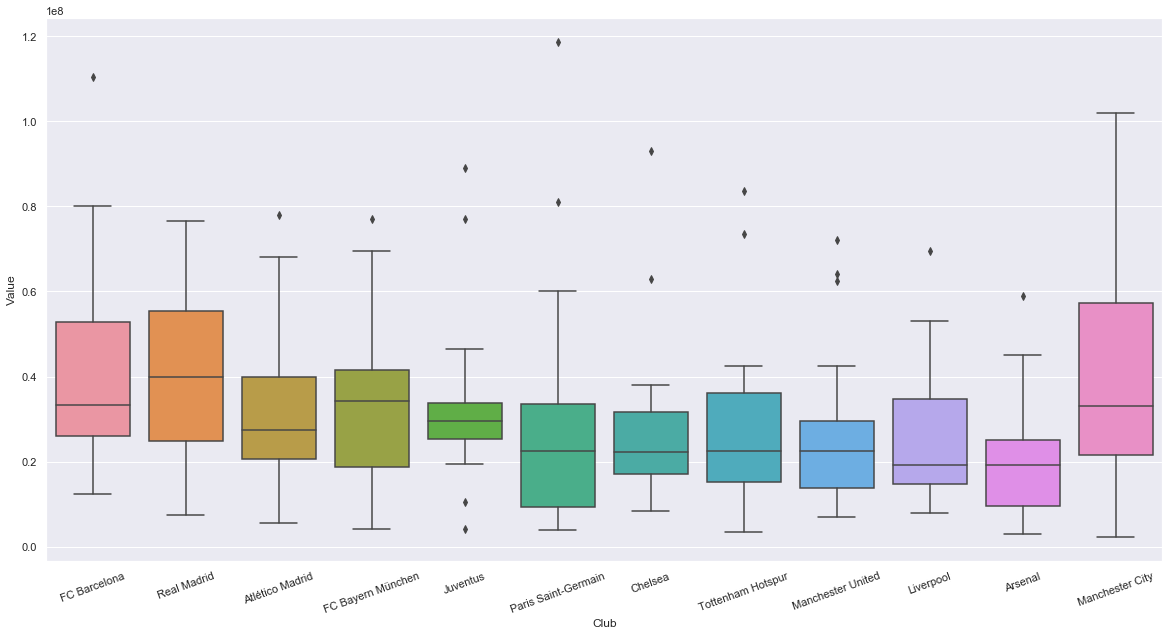

In [37]:
fig, ax = subplts(20, 10)
chart = sns.boxplot(x='Club', y='Value', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

In [38]:
fifa_new.sort_values(by = 'Value', ascending = False)[['Name', 'Club', 'Value']].head(5).style

,Name,Club,Value
40,Neymar Jr,Paris Saint-Germain,118500000
0,L. Messi,FC Barcelona,110500000
80,K. De Bruyne,Manchester City,102000000
100,E. Hazard,Chelsea,93000000
22,P. Dybala,Juventus,89000000


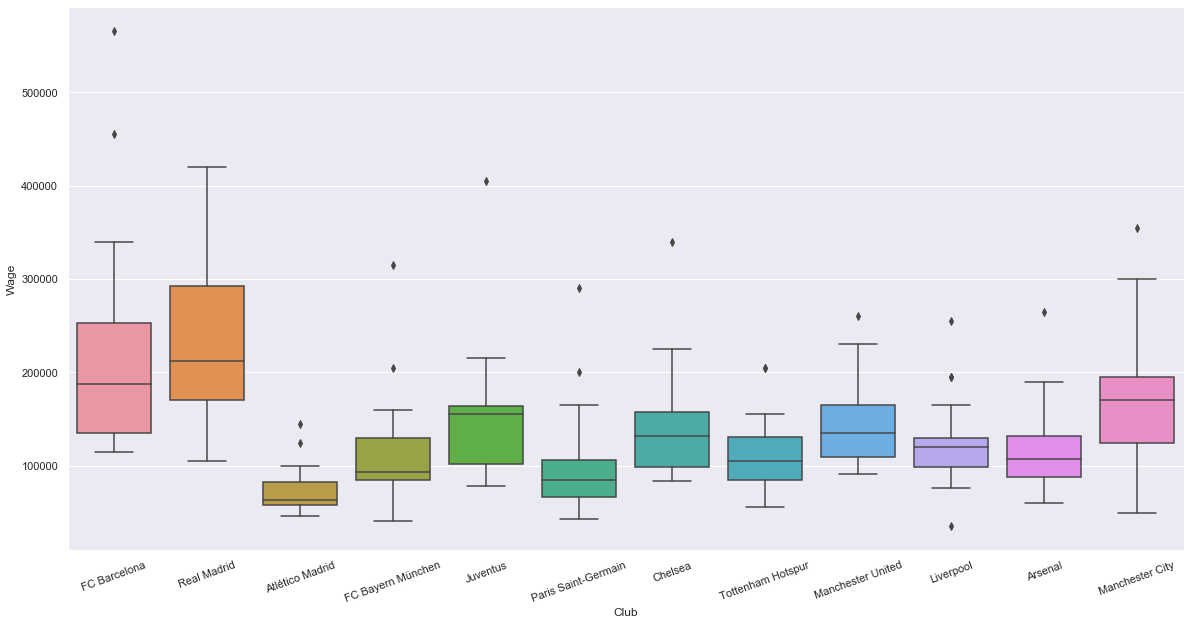

In [39]:
fig, ax = subplts(20, 10)
chart = sns.boxplot(x='Club', y='Wage', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

In [40]:
fifa_new.sort_values(by = 'Wage', ascending = False)[['Name', 'Club', 'Wage']].head(5).style

,Name,Club,Wage
0,L. Messi,FC Barcelona,565000
1,L. Suárez,FC Barcelona,455000
120,L. Modrić,Real Madrid,420000
20,Cristiano Ronaldo,Juventus,405000
121,Sergio Ramos,Real Madrid,380000


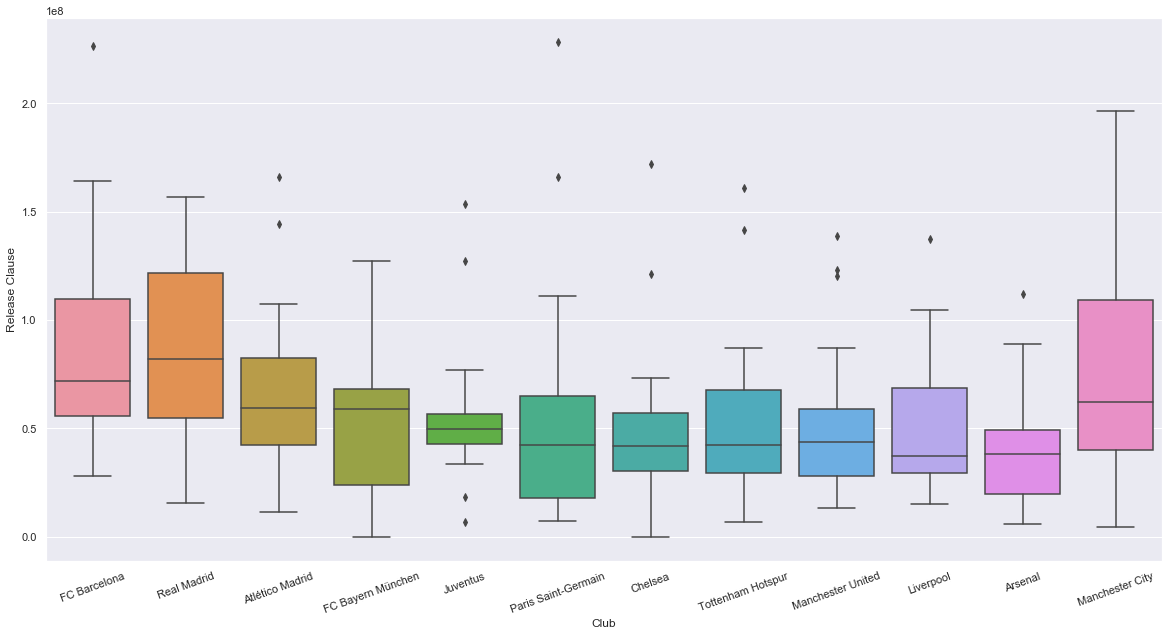

In [41]:
fig, ax = subplts(20, 10)
chart = sns.boxplot(x='Club', y='Release Clause', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

In [42]:
fifa_new.sort_values(by = 'Release Clause', ascending = False)[['Name', 'Club', 'Release Clause']].head(5).style

,Name,Club,Release Clause
40,Neymar Jr,Paris Saint-Germain,228100000
0,L. Messi,FC Barcelona,226500000
80,K. De Bruyne,Manchester City,196400000
100,E. Hazard,Chelsea,172100000
42,K. Mbappé,Paris Saint-Germain,166100000


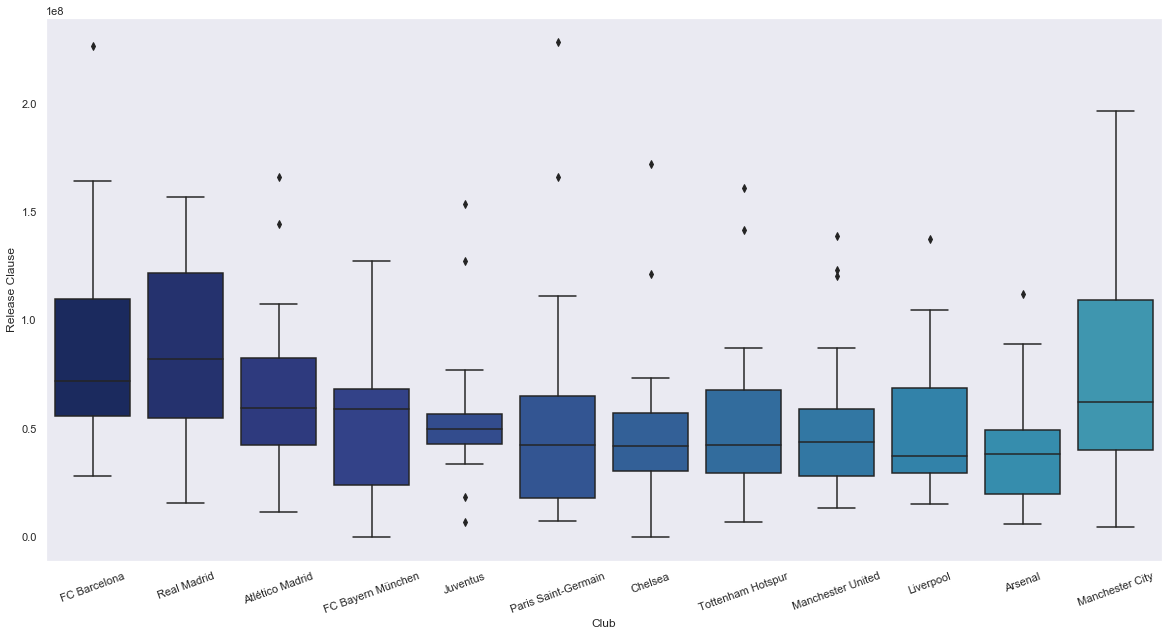

In [129]:
fig, ax = subplts(20, 10)
chart = sns.boxplot(x='Club', y='Release Clause', data=clubs_vis.loc[clubs_to_vis, :], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20);

## Player Attribute Visualizations

### Height and Weight Dist.

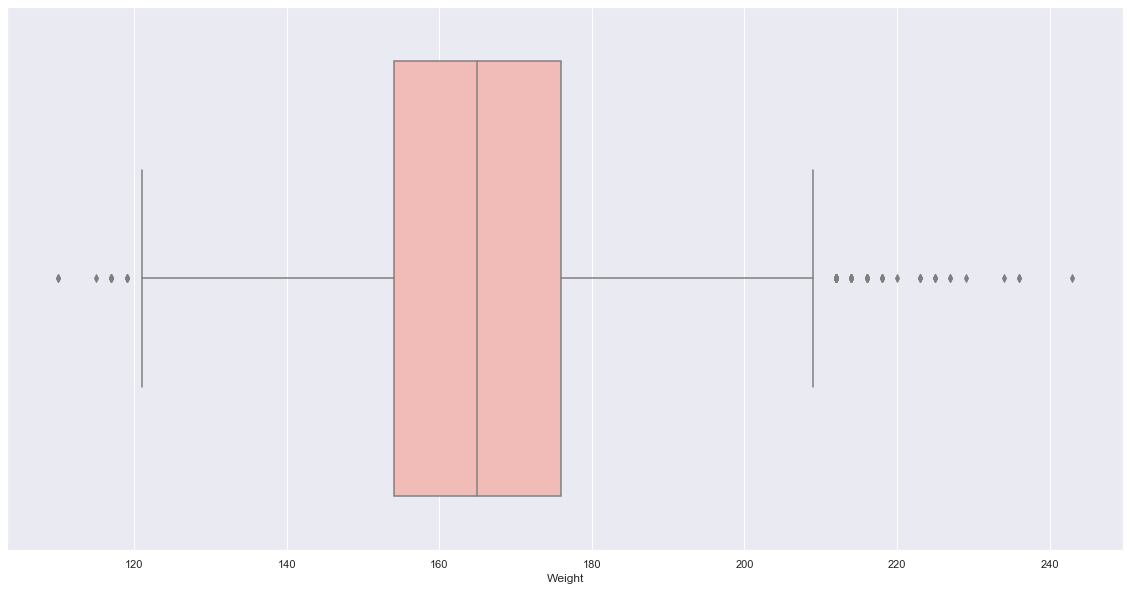

In [43]:
fig, ax = subplts(20,10)
sns.boxplot(fifa['Weight'], ax=ax);

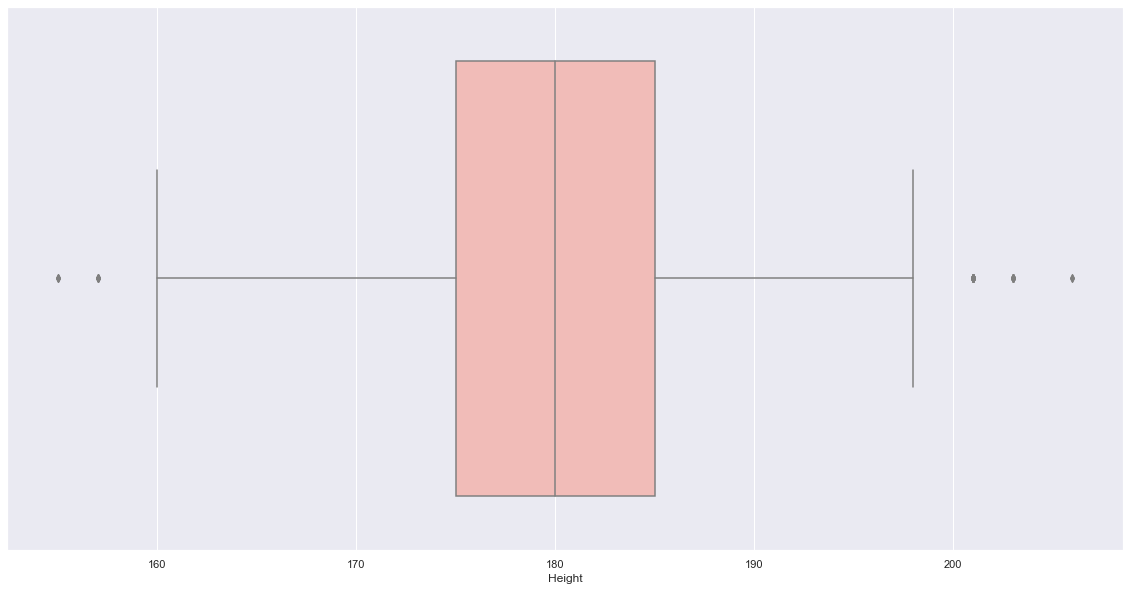

In [44]:
fig, ax = subplts(20,10)
sns.boxplot(fifa['Height'], ax=ax);

In [45]:
height_mean = fifa.groupby('Position')['Height'].mean()
height_mean.sort_values(inplace = True)

### Skill Moves and Position Distribution

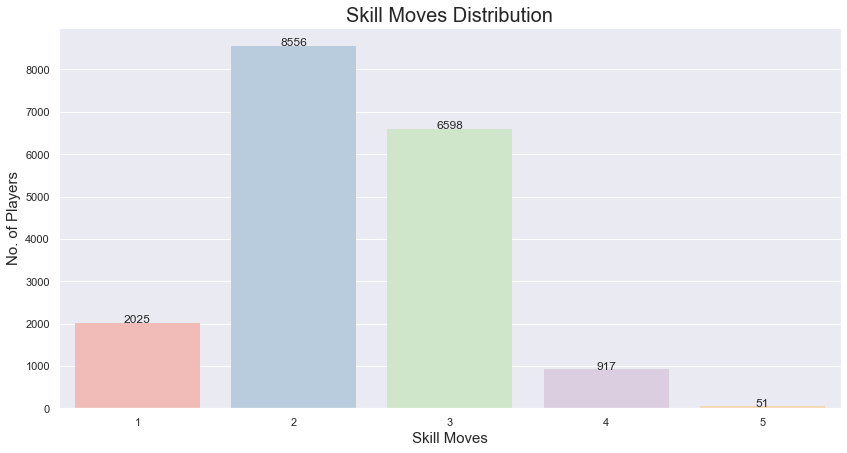

In [46]:
skill_moves = fifa.loc[:, 'Skill Moves'].value_counts().sort_values(ascending = False)
fig, ax = subplts(14, 7)
smoves = sns.barplot(x = skill_moves.index, y = skill_moves.values, ax=ax);
ax.set_ylabel('No. of Players', size = 15);
ax.set_xlabel('Skill Moves', size = 15);
ax.set_title('Skill Moves Distribution', size = 20);
for index, value in zip(skill_moves.index, skill_moves.values):
    smoves.text(index-1, value, value, ha="center")

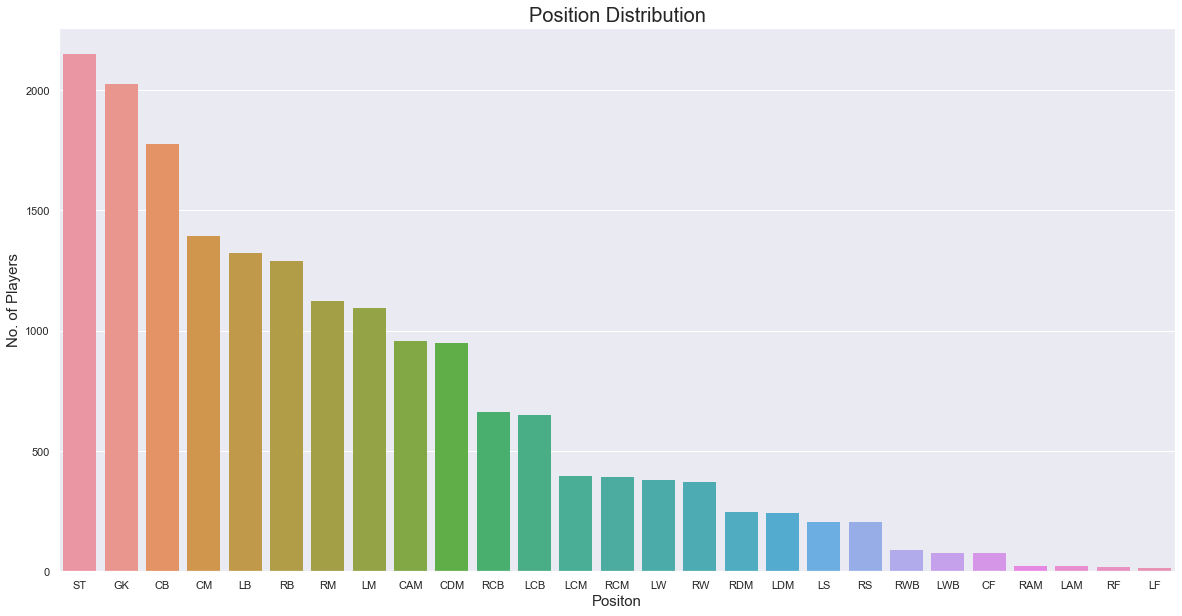

In [47]:
position = fifa.loc[:, 'Position'].value_counts().sort_values(ascending = False)
fig, ax = subplts(20, 10)
sns.barplot(x = position.index, y = position.values, ax=ax, palette = sns.set_palette('Pastel1'));
ax.set_ylabel('No. of Players', size = 15);
ax.set_xlabel('Positon', size = 15);
ax.set_title('Position Distribution', size = 20);

### Skill Moves vs Position

In [48]:
skill_pos_df = fifa[['Skill Moves', 'Position']].copy()

In [49]:
skill_pos_df = pd.crosstab(index = skill_pos_df['Skill Moves'], columns=skill_pos_df['Position'])

In [50]:
skill_pos_df

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Skill Moves,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,2025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,191,1746,642,19,690,0,1,789,618,122,...,786,637,123,117,0,269,63,74,55,1068
3,616,32,303,41,660,0,12,508,30,240,...,486,25,238,121,11,706,119,223,31,995
4,146,0,3,14,43,0,8,24,0,31,...,19,0,30,9,5,137,20,68,1,86
5,5,0,0,0,1,0,0,1,0,2,...,0,0,0,1,0,12,1,5,0,3


In [51]:
skill_dict = {}

for i in range(0,5):
    skill_dict['skill_{0}'.format(i+1)] = pd.Series(data = skill_pos_df.iloc[i, :], index = skill_pos_df.columns).sort_values(ascending=False)

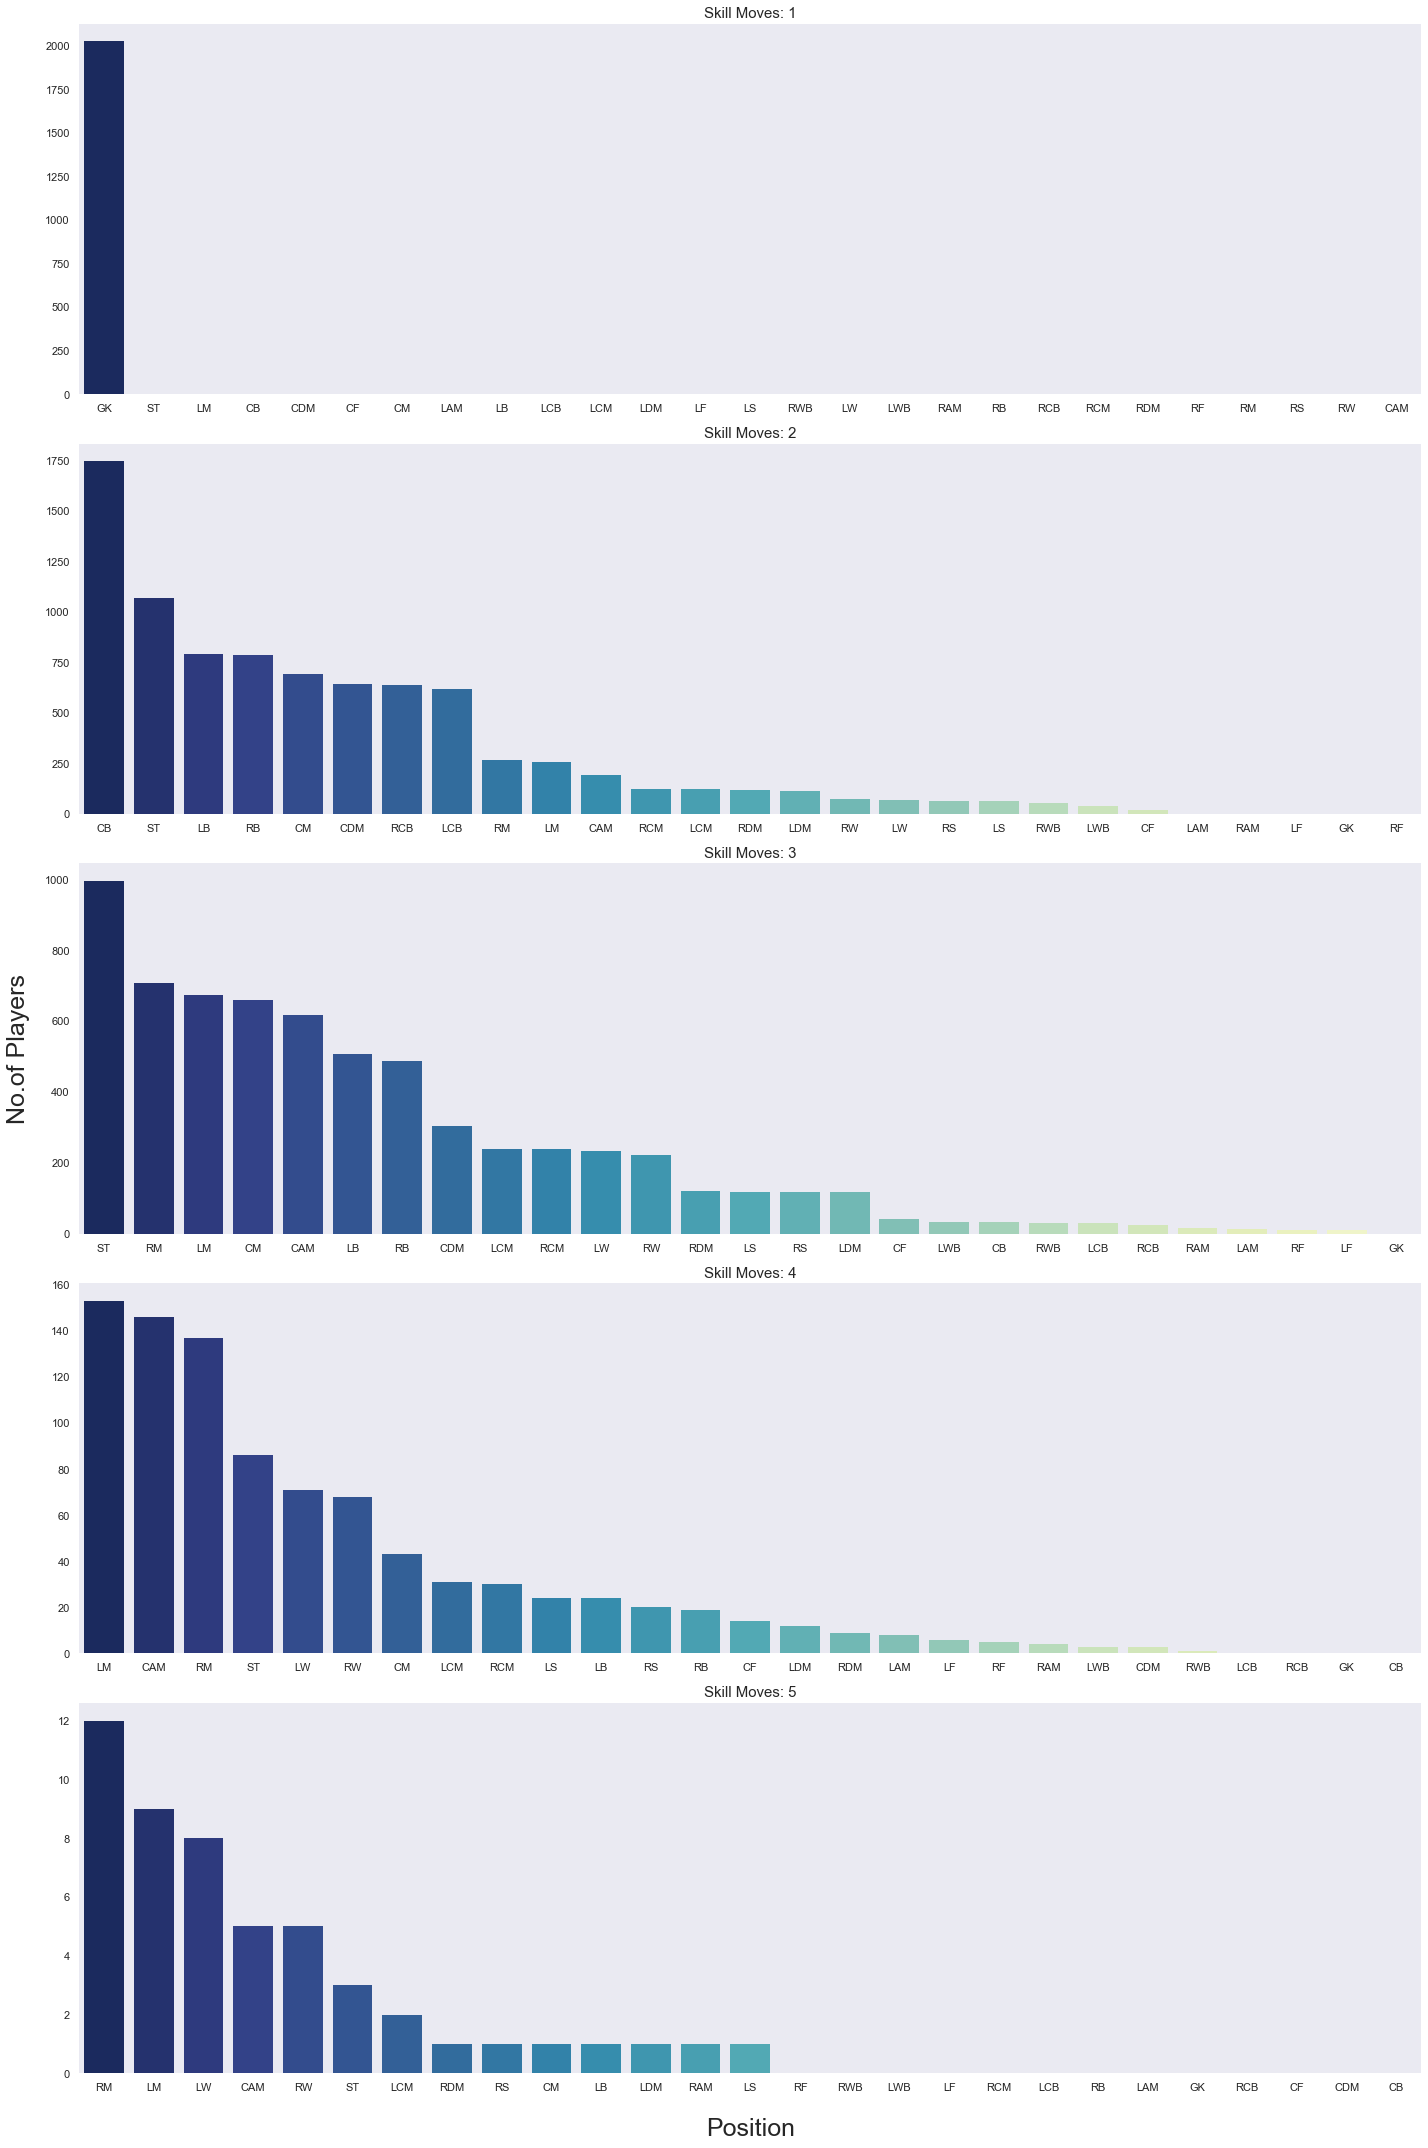

In [52]:
current_set = sns_set('n', 'd')
sns.set_context(rc = {'patch.linewidth': 0.0})
fig, axes = plt.subplots(5, 1, figsize = (20,30))
axes = axes.ravel()
pal = sns.set_palette("YlGnBu_r", n_colors=len(skill_dict['skill_{0}'.format(i+1)].index))
for i in range(5):
    spos = sns.barplot(x = skill_dict['skill_{0}'.format(i+1)].index, y = skill_dict['skill_{0}'.format(i+1)].values, ax = axes[i])
    axes[i].set_xlabel('Position', size = 25, labelpad = 25)
    if(i!=4):
        axes[i].set_xlabel('')
    if(i==2):
        axes[i].set_ylabel('No.of Players', size = 25, labelpad = 15)
    axes[i].set_title('Skill Moves: {0}'.format(i+1), size = 15)
fig.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)